In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller



In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.columns = ['Temp']

df.head()
df = df.asfreq('D')



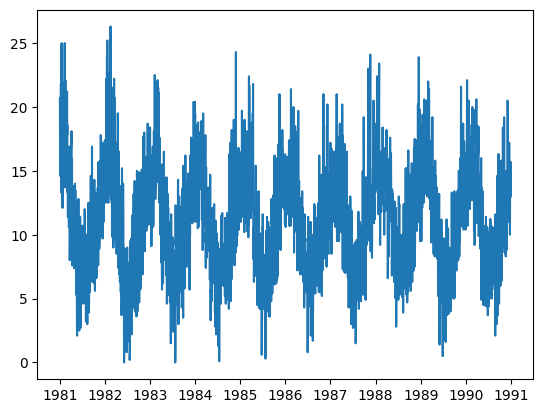

In [3]:
plt.plot(df['Temp'])


In [4]:
df.isnull().sum()

adfuller(df['Temp'])[1]


MissingDataError: exog contains inf or nans

In [ ]:
model = ARIMA(df['Temp'],order=(2,0,2))
result = model.fit()

C:\Users\sujin\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
forecast = result.forecast(steps=30)
print(forecast)

1991-01-01    12.993677
1991-01-02    13.398723
1991-01-03    13.486325
1991-01-04    13.496436
1991-01-05    13.487694
1991-01-06    13.474428
1991-01-07    13.460138
1991-01-08    13.445679
1991-01-09    13.431259
1991-01-10    13.416929
1991-01-11    13.402701
1991-01-12    13.388577
1991-01-13    13.374557
1991-01-14    13.360640
1991-01-15    13.346825
1991-01-16    13.333112
1991-01-17    13.319501
1991-01-18    13.305989
1991-01-19    13.292577
1991-01-20    13.279264
1991-01-21    13.266049
1991-01-22    13.252932
1991-01-23    13.239911
1991-01-24    13.226986
1991-01-25    13.214156
1991-01-26    13.201421
1991-01-27    13.188779
1991-01-28    13.176231
1991-01-29    13.163775
1991-01-30    13.151411
Freq: D, Name: predicted_mean, dtype: float64


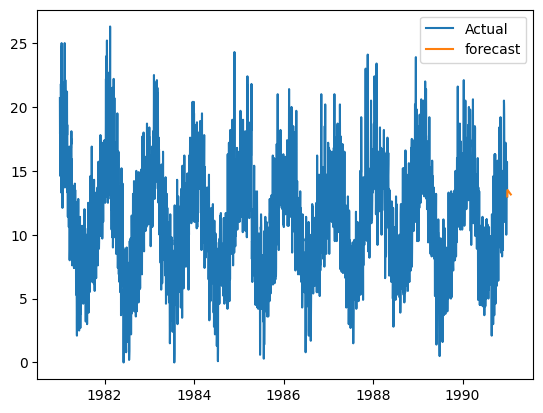

In [ ]:
plt.plot(df['Temp'],label='Actual')
plt.plot(forecast,label='forecast')
plt.legend()
plt.show()


In [ ]:
train = df[:-30]
test = df[-30:]

In [ ]:
model_train = ARIMA(train['Temp'],order=(2,1,2))
result_train = model_train.fit()

forecast_test = result_train.forecast(steps=len(test))

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Temp'],forecast_test)
mae

2.311526800462537

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax = SARIMAX(df['Temp'],seasonal_order=(1,1,1,365),order=(2,0,2))

result_sarimax = model_sarimax.fit()
print(result.summary())

KeyboardInterrupt: 